In [71]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [88]:
from sklearn.datasets import load_boston
from scipy.linalg import lstsq

In [3]:
boston = load_boston()

Text(0, 0.5, 'Number of houses')

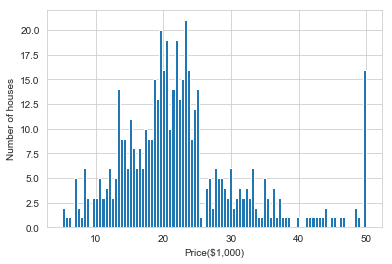

In [6]:
plt.hist(boston.target,bins=100)
plt.xlabel("Price($1,000)")
plt.ylabel("Number of houses")

Text(0, 0.5, 'Number of rooms')

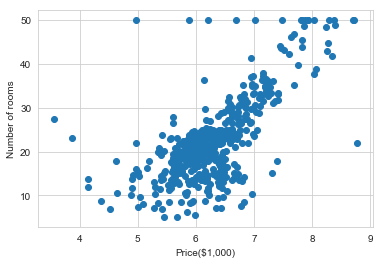

In [23]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel("Price($1,000)")
plt.ylabel("Number of rooms")

In [24]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [27]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston_df["Price"] = boston.target

/Users/shin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


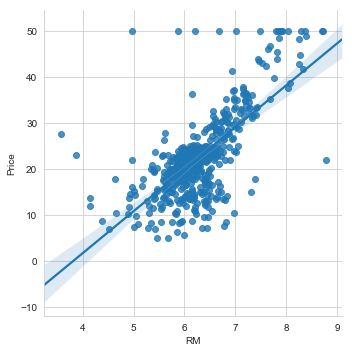

In [28]:
sns.lmplot('RM','Price',data=boston_df)

In [45]:
X = np.vstack(boston_df.RM)

In [46]:
X.shape

(506, 1)

In [47]:
Y = boston_df.Price

In [100]:
# 部屋数
X = boston_df.RM
print(X.shape)
# これを2次元のarrayにします。
X = np.vstack(boston_df.RM)
print(X.shape)

Y = boston_df.Price
print(Y.shape)

# Xを[X 1]の形にします。
X = np.array( [ [value[0],1] for value in X ] )

(506,)
(506, 1)
(506,)


In [102]:
# 最小二乗法の計算を実行します。
a,b = np.linalg.lstsq(X,Y)[0]

/Users/shin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


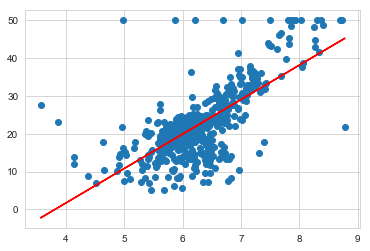

In [103]:
plt.plot(boston_df.RM,boston_df.Price,"o")
x = boston_df.RM
plt.plot(x,a*x+b,"r")

In [104]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]

/Users/shin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [106]:
rmse = np.sqrt(error_total/len(X))

rmse

In [110]:
print("平均二乗誤差の平方根={:0.2f}".format(rmse[0]))

平均二乗誤差の平方根=6.60


In [111]:
import sklearn
from sklearn.linear_model import LinearRegression

In [112]:
lreg = LinearRegression()

In [113]:
x_m = boston_df.drop("Price",1)

In [114]:
x_m.shape

(506, 13)

In [115]:
y_target = boston_df.Price

In [116]:
lreg.fit(x_m,y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
lreg.intercept_

36.45948838509015

In [119]:
c_df = DataFrame(boston_df.columns)

In [120]:
c_df.columns = ["Features"]

In [123]:
c_df["Cofficient Estimate"] = pd.Series(lreg.coef_)


In [124]:
c_df

,Features,Cofficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [135]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x_m,boston_df.Price)

In [136]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [137]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
pred_train = lreg.predict(X_train)

In [140]:
pred_test = lreg.predict(X_test)

In [141]:
np.mean((Y_train - pred_train)**2)

21.403643668188483

In [142]:
np.mean((Y_test - pred_test)**2)

24.599059075984083

Text(0.5, 1.0, 'Residual Plots')

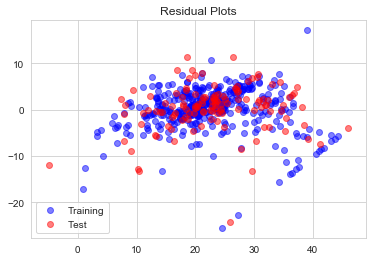

In [146]:
train = plt.scatter(pred_train,(pred_train - Y_train),c="b",alpha=0.5)
test = plt.scatter(pred_test,(pred_test - Y_test),c="r",alpha=0.5)

plt.legend((train,test),("Training","Test"),loc="lower left")
plt.title("Residual Plots")